In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt
from numpy.random import seed
import tensorflow as tf

In [ ]:
train = pd.read_csv('train_clean.csv', )
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [ ]:
df.head()


,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [ ]:
df.describe(include='all')

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
count,1309.000000,295,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309,1309
unique,NaN,186,3,NaN,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929,6
top,NaN,C23 C25 C27,S,NaN,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343,Mr
freq,NaN,6,915,NaN,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11,767
mean,29.562391,NaN,NaN,0.883881,33.276193,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN,NaN
std,13.165360,NaN,NaN,1.583639,51.743584,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN,NaN
min,0.170000,NaN,NaN,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,22.000000,NaN,NaN,0.000000,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN
50%,30.000000,NaN,NaN,0.000000,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN,NaN
75%,35.500000,NaN,NaN,1.000000,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN,NaN


In [ ]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [ ]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int8

In [ ]:
categorical = ['Embarked', 'Title']
for var in categorical:
    df = pd.concat([df, pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [ ]:
df.head()

,Age,Cabin,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,NaN,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,0,0,1,0,0,0,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,PC 17599,1,0,0,0,0,0,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,STON/O2. 3101282,0,0,1,0,0,1,0,0,0
3,35.0,C123,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,113803,0,0,1,0,0,0,0,1,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,0,0,1,0,0,0,1,0,0


In [ ]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

In [ ]:
scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,0.0,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.0,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,NaN,NaN,NaN,0.0,1.000382,-0.643344,-0.490691,-0.363894,-0.03869,9.261749
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.0,1.000382,-0.445,-0.445,-0.445,-0.445,9.956864
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,-0.0,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,NaN,NaN,NaN,0.644003,0.478997,0.0,0.0,1.0,1.0,1.0
SibSp,1309.0,NaN,NaN,NaN,-0.0,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909


In [ ]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [ ]:
df.describe(include='all').T

In [ ]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [ ]:
def create_model(lyrs=[8,10,10], act='linear', opt='Adam', dr=0.0):
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    model = Sequential()
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    # add dropout, default is none
    model.add(Dropout(dr))
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [ ]:
val_acc = np.mean(training.history['accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 80.90%


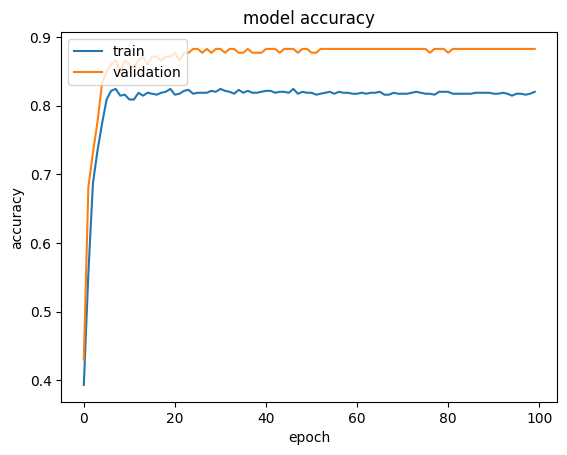

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = KerasClassifier(model=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   6.3s
[CV] END ...........................batch_size=16, epochs=50; total time=   6.4s
[CV] END ...........................batch_size=16, epochs=50; total time=   3.8s
[CV] END ..........................batch_size=16, epochs=100; total time=  11.2s
[CV] END ..........................batch_size=16, epochs=100; total time=   8.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.8s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.8s
[CV] END ...........................batch_size=32, epochs=50; total time=   2.5s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.4s
[CV] END ..........................batch_size=32, epochs=100; total time=   6.0s
[CV] END ..........................batch_size=32, epochs=100; total time=   6.0s
[CV] END ..........................batch_size=32,

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820426 using {'batch_size': 32, 'epochs': 50}
0.818182 (0.009912) with: {'batch_size': 16, 'epochs': 50}
0.810325 (0.013837) with: {'batch_size': 16, 'epochs': 100}
0.820426 (0.008399) with: {'batch_size': 32, 'epochs': 50}
0.811448 (0.015307) with: {'batch_size': 32, 'epochs': 100}
0.820426 (0.012992) with: {'batch_size': 64, 'epochs': 50}
0.817059 (0.011111) with: {'batch_size': 64, 'epochs': 100}


In [ ]:
# create model
model = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ......................................optimizer=SGD; total time=   3.6s
[CV] END ......................................optimizer=SGD; total time=   3.2s
[CV] END ......................................optimizer=SGD; total time=   3.5s
[CV] END ......................................optimizer=SGD; total time=   3.5s
[CV] END ......................................optimizer=SGD; total time=   3.7s
[CV] END ..................................optimizer=RMSprop; total time=   3.4s
[CV] END ..................................optimizer=RMSprop; total time=   3.5s
[CV] END ..................................optimizer=RMSprop; total time=   3.5s
[CV] END ..................................optimizer=RMSprop; total time=   3.8s
[CV] END ..................................optimizer=RMSprop; total time=   2.7s
[CV] END ..................................optimizer=Adagrad; total time=   3.4s
[CV] END ..................................optimi

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828278 using {'optimizer': 'Adam'}
0.828266 (0.028869) with: {'optimizer': 'SGD'}
0.828272 (0.024325) with: {'optimizer': 'RMSprop'}
0.822654 (0.028209) with: {'optimizer': 'Adagrad'}
0.824907 (0.028115) with: {'optimizer': 'Adadelta'}
0.828278 (0.022948) with: {'optimizer': 'Adam'}
0.826031 (0.024917) with: {'optimizer': 'Adamax'}
0.826031 (0.027333) with: {'optimizer': 'Nadam'}


In [ ]:
seed(42)
tf.random.set_seed(42)

# create model
model = KerasClassifier(lyrs=[8],model=create_model,
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................lyrs=[8]; total time=   6.0s
[CV] END ...........................................lyrs=[8]; total time=   2.8s
[CV] END ...........................................lyrs=[8]; total time=   3.4s
[CV] END ...........................................lyrs=[8]; total time=   3.5s
[CV] END ...........................................lyrs=[8]; total time=   3.5s
[CV] END ..........................................lyrs=[10]; total time=   3.4s
[CV] END ..........................................lyrs=[10]; total time=   3.6s
[CV] END ..........................................lyrs=[10]; total time=   3.7s
[CV] END ..........................................lyrs=[10]; total time=   3.5s
[CV] END ..........................................lyrs=[10]; total time=   3.5s
[CV] END .......................................lyrs=[10, 5]; total time=   6.3s
[CV] END .......................................l

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828278 using {'lyrs': [10, 5]}
0.826031 (0.025169) with: {'lyrs': [8]}
0.824901 (0.024557) with: {'lyrs': [10]}
0.828278 (0.026040) with: {'lyrs': [10, 5]}
0.827155 (0.026953) with: {'lyrs': [12, 6]}
0.827155 (0.026481) with: {'lyrs': [12, 8, 4]}


In [ ]:
model = KerasClassifier(model=create_model,
                        epochs=50, batch_size=32, verbose=0,dr=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time=   3.6s
[CV] END .............................................dr=0.0; total time=   3.3s
[CV] END .............................................dr=0.0; total time=   3.5s
[CV] END .............................................dr=0.0; total time=   2.9s
[CV] END .............................................dr=0.0; total time=   3.5s
[CV] END ............................................dr=0.01; total time=   3.7s
[CV] END ............................................dr=0.01; total time=   4.3s
[CV] END ............................................dr=0.01; total time=   3.8s
[CV] END ............................................dr=0.01; total time=   4.0s
[CV] END ............................................dr=0.01; total time=   3.0s
[CV] END ............................................dr=0.05; total time=   3.5s
[CV] END ........................................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830519 using {'dr': 0.05}
0.828272 (0.027492) with: {'dr': 0.0}
0.824907 (0.028339) with: {'dr': 0.01}
0.830519 (0.025276) with: {'dr': 0.05}
0.826031 (0.024917) with: {'dr': 0.1}
0.821537 (0.024799) with: {'dr': 0.2}
0.820407 (0.024744) with: {'dr': 0.5}


In [ ]:
model = create_model(lyrs=[8], dr=0.2)

print(model.summary())

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_247 (Dense)           (None, 8)                 136       
                                                                 
 dropout_113 (Dropout)       (None, 8)                 0         
                                                                 
 dense_248 (Dense)           (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
training = model.fit(X_train, y_train, epochs=50, batch_size=32,
                     validation_split=0.2, verbose=0)

In [ ]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8283

accuracy: 82.83%


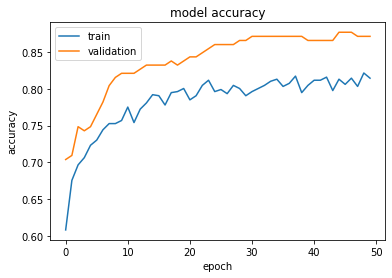

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]

14/14 [==============================] - 0s 2ms/step


In [ ]:
solution.head(10)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
